# **Algoritma K-Means**

**K-Means Clustering** adalah salah satu algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa cluster berdasarkan kesamaan tertentu. Algoritma ini bekerja dengan cara membagi dataset yang tidak berlabel menjadi K cluster, di mana setiap cluster memiliki titik pusat yang disebut centroid.


**Manfaat clustering**


- Segmentasi Data – Memudahkan dalam mengelompokkan data berdasarkan pola tertentu, seperti segmentasi pelanggan dalam bisnis.

- Deteksi Pola – Membantu menemukan pola tersembunyi dalam dataset yang besar, berguna dalam riset pasar dan analisis tren.

- Efisiensi dalam Pengolahan Data – Algoritma ini cepat dan efisien, sehingga cocok untuk dataset berukuran besar.

- Penerapan dalam Berbagai Industri – Digunakan dalam pengelompokan dokumen, segmentasi gambar, dan kompresi gambar.

- Membantu Pengambilan Keputusan – Dengan mengelompokkan data ke dalam kategori yang lebih jelas, K-Means Clustering membantu dalam pengambilan keputusan berbasis data.


**Inertia (Sum Square error/SSE)**


Inertia (Sum of Squared Errors/SSE) adalah metrik yang digunakan dalam K-Means Clustering untuk mengukur seberapa baik data dikelompokkan ke dalam cluster. Inertia dihitung sebagai jumlah kuadrat jarak antara setiap titik data dan centroid cluster yang ditetapkan.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

**Silhouette Analysis**


Silhouette Analysis adalah metode evaluasi dalam clustering yang digunakan untuk mengukur seberapa baik setiap titik data berada dalam cluster yang sesuai dibandingkan dengan cluster lainnya. Teknik ini memberikan gambaran grafis tentang seberapa baik objek telah diklasifikasikan.

Silhouette Analysis sering digunakan untuk menentukan jumlah cluster optimal dalam K-Means Clustering. Dengan membandingkan Silhouette Score untuk berbagai jumlah cluster, kita bisa memilih jumlah cluster yang memberikan pemisahan terbaik.

Rumusnya Silhouette Score adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## Implementasi dengan menggunakan data Iris

In [6]:
%pip install pymysql
%pip install psycopg2

## Library yang digunakan

In [7]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [8]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-319a464f-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_EVJaXCw9MKrhLxoQcKj",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lira.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19018c16-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_rsy2_HLnOlER6ZAwLDN",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa          14.0          2.0          41.0         32.0
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa          13.0          2.0          40.0         56.0
  4     Iris-setosa          15.0          2.0          23.0         47.0
  5     Iris-setosa          14.0          2.0          38.0         52.0
  6     Iris-setosa           1.7          0.4           3.5          4.2
  7     Iris-setosa           1.4          0.3           3.5          5.7
  8     Iris-setosa           1.5          0.2           4.5          5.0
  9     Iris-setosa           1.4          0.2           4.3          5.4
 10     Iris-setosa           1.5          0.1           3.5          4.5
 11     Iris-setosa           1.5          0.2           4.3          5.6
 12     Iris-setosa           1.6          0.2           4.3          5.8
 13     Iris-setosa           1.4     

## Data asli sebelum di normalisasi

Ini adalah data sebelum normalisasi

In [9]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal length  petal width  sepal length  sepal width
         14.0          2.0          41.0         32.0
         14.0          2.0          40.9         30.0
         13.0          2.0          40.0         56.0
         15.0          2.0          23.0         47.0
         14.0          2.0          38.0         52.0
          1.7          0.4           3.5          4.2
          1.4          0.3           3.5          5.7
          1.5          0.2           4.5          5.0
          1.4          0.2           4.3          5.4
          1.5          0.1           3.5          4.5
          1.5          0.2           4.3          5.6
          1.6          0.2           4.3          5.8
          1.4          0.1           3.8          4.0
          1.1          0.1           3.7          5.6
          1.2          0.2           5.0          3.6
          1.5          0.4           5.0          3.5
          1.3          0.4           5.4          3.9
          1.4          0.3  

*  **Visualisasi data asli tanpa tanpa PCA**

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

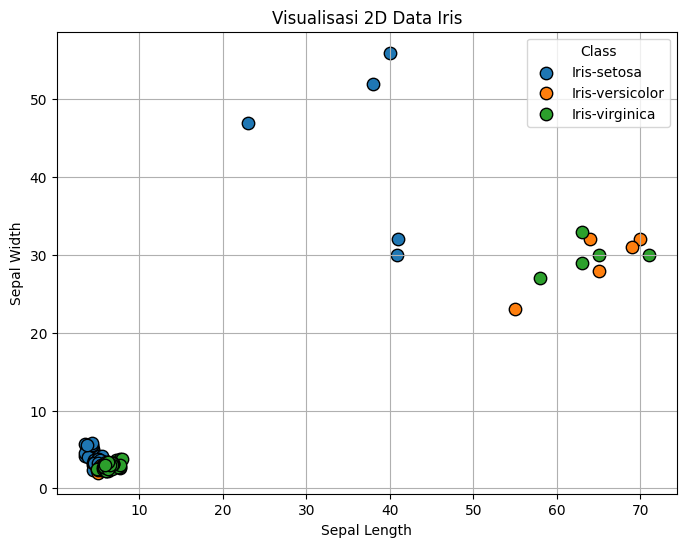

In [10]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

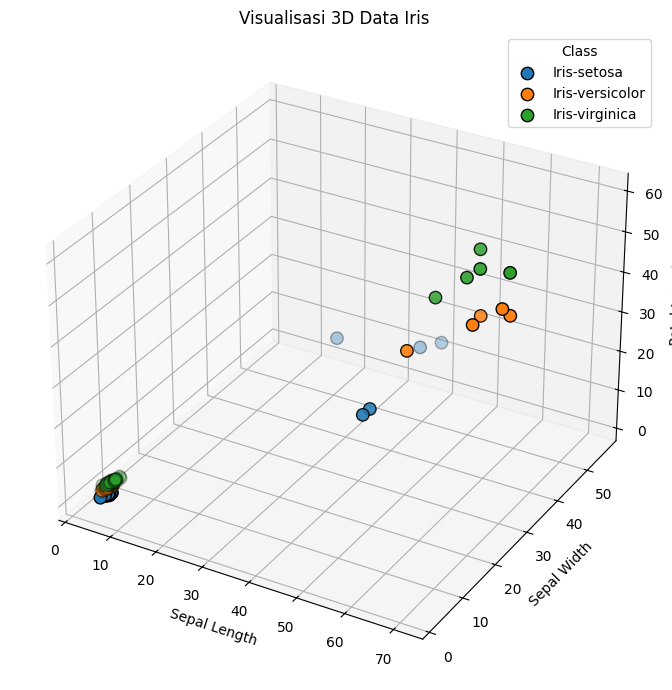

In [11]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

*  **Visualisasi data asli tanpa PCA**

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa PCA

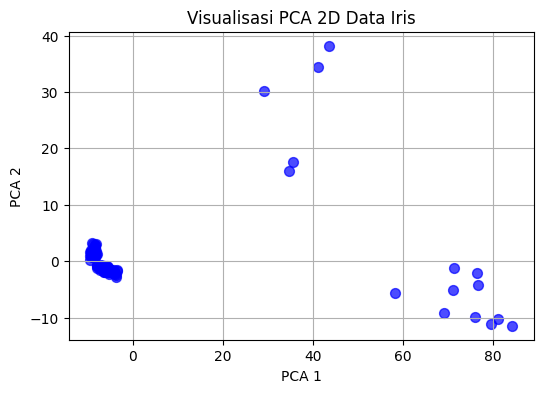

In [12]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi tanpa PCA

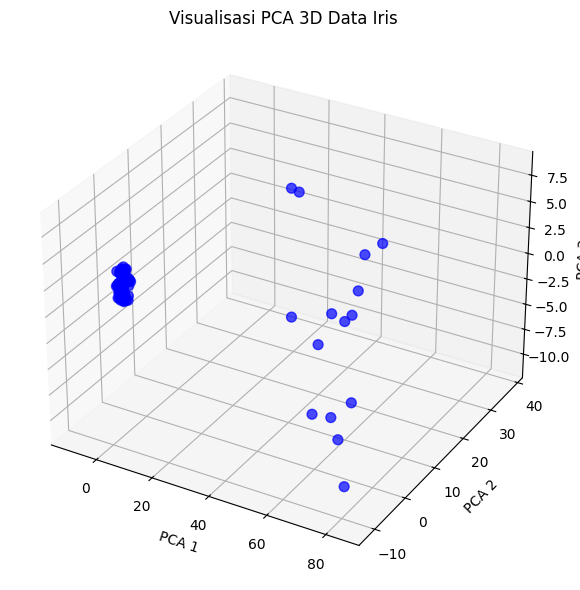

In [13]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


#  **Preprocessing dan Reduksi Dimensi**

**Standarisasi menggunakan MinMaxScaler**

Proses preprocessing data dengan menggunakan MinMaxScaler dimulai dengan mengimpor data ke dalam program, umumnya menggunakan library pandas. Data bisa berasal dari berbagai sumber seperti file Excel (.xlsx) atau CSV (.csv). Setelah data dimuat, tahap berikutnya adalah melakukan pemeriksaan awal terhadap dataset, termasuk menampilkan beberapa baris pertama, melihat tipe data setiap kolom, serta mengecek adanya nilai yang hilang (missing values). Nilai kosong harus ditangani terlebih dahulu karena dapat mengganggu proses normalisasi. Salah satu cara umum untuk mengatasinya adalah dengan mengganti nilai kosong menggunakan nilai rata-rata (mean) dari kolom tersebut.

Setelah data bersih dari nilai kosong, langkah selanjutnya adalah memilih kolom-kolom numerik yang relevan untuk dilakukan proses standarisasi. Kolom-kolom ini biasanya berupa data kuantitatif seperti umur, berat badan, tinggi badan, atau jumlah hari perawatan. Proses standarisasi kemudian dilakukan menggunakan MinMaxScaler dari library sklearn.preprocessing.

In [14]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


dibawah ini adalah data hasil standarisasi menggunakan MinMaxScaler

In [15]:
print (scaled_features);

[[0.22033898 0.07630522 0.55555556 0.55555556]
 [0.22033898 0.07630522 0.55407407 0.51851852]
 [0.20338983 0.07630522 0.54074074 1.        ]
 [0.23728814 0.07630522 0.28888889 0.83333333]
 [0.22033898 0.07630522 0.51111111 0.92592593]
 [0.01186441 0.01204819 0.         0.04074074]
 [0.00677966 0.00803213 0.         0.06851852]
 [0.00847458 0.00401606 0.01481481 0.05555556]
 [0.00677966 0.00401606 0.01185185 0.06296296]
 [0.00847458 0.         0.         0.0462963 ]
 [0.00847458 0.00401606 0.01185185 0.06666667]
 [0.01016949 0.00401606 0.01185185 0.07037037]
 [0.00677966 0.         0.00444444 0.03703704]
 [0.00169492 0.         0.00296296 0.06666667]
 [0.00338983 0.00401606 0.02222222 0.02962963]
 [0.00847458 0.01204819 0.02222222 0.02777778]
 [0.00508475 0.01204819 0.02814815 0.03518519]
 [0.00677966 0.00803213 0.0237037  0.02777778]
 [0.01186441 0.00803213 0.03259259 0.03333333]
 [0.00847458 0.00803213 0.0237037  0.03333333]
 [0.01186441 0.00401606 0.02814815 0.02592593]
 [0.00847458 

## Clustering menggunakan K-Means

**Clustering dengan 2 cluster dan Visualisasi data**

saya melakukan clustering menggunakan K-Means dengan 2 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 4.3866, Silhouette Score: 0.9038


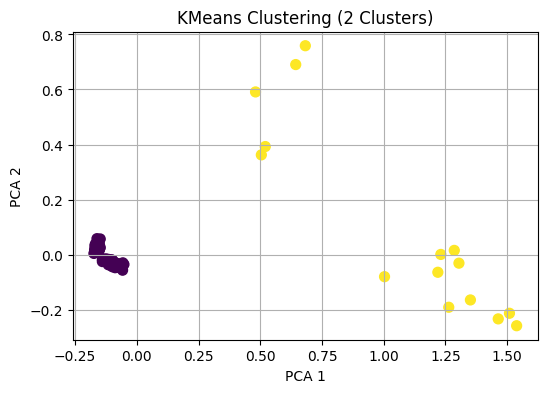

In [16]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 4.3866, Silhouette Score: 0.9038


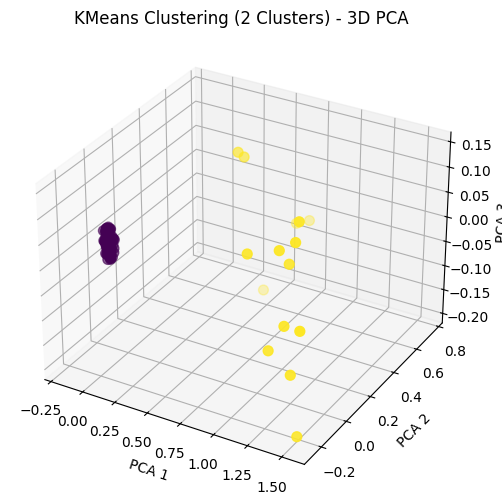

In [17]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


**Clustering dengan 3 cluster dan Visualisasi data**

saya melakukan clustering menggunakan K-Means dengan 3 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 0.9604, Silhouette Score: 0.9147


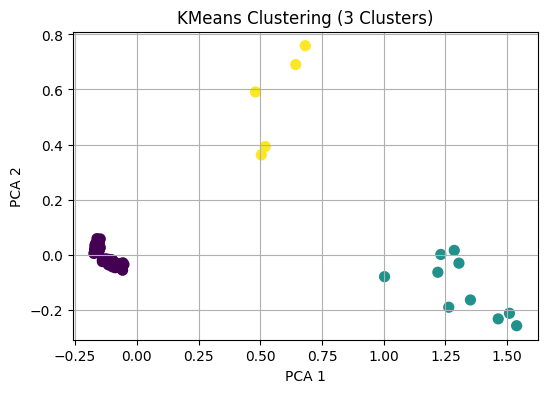

In [18]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 0.9604, Silhouette Score: 0.9147


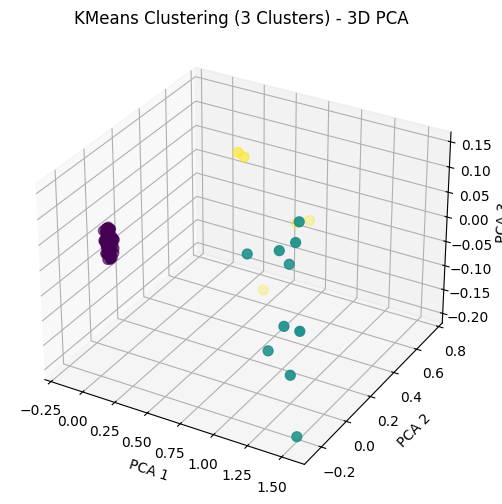

In [19]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

*  **Clustering dengan 4 cluster dan Visualisasi data**


saya melakukan clustering menggunakan K-Means dengan 4 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 0.6909, Silhouette Score: 0.8974


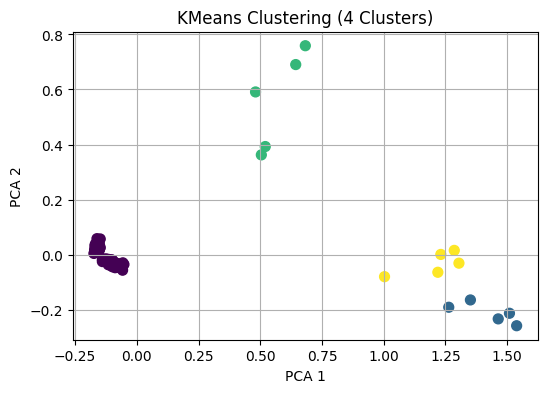

In [20]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 0.6909, Silhouette Score: 0.8974


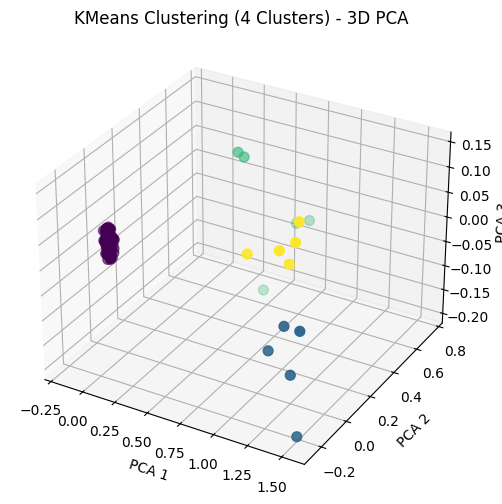

In [21]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
